In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/shopping_trends.csv"
data = pd.read_csv(file_path)

# Initial Dataset Exploration

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually




1. Column should be droped
  * Customer ID
2. Columns should be grouped into bins:
  * Age
  * Purchase Amount

In [ ]:
# Concise the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

* Every column is in correct data type
* We need to standarize the column names for the easy of analyze

In [ ]:
# Descriptive analysis of the numerical variables
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


* Descriptive analysis makes no sense for Customer ID column becouse its just a system genrated number for each record
* Dataset have no outliers bacouse the mean and median values of the numerical variables are almost equal

In [ ]:
data["Category"].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [ ]:
# Calculate the percentage of items purchased in each category
category_percentages = data['Category'].value_counts(normalize=True) * 100
category_percentages

,proportion
Category,
Clothing,44.538462
Accessories,31.794872
Footwear,15.358974
Outerwear,8.307692


* Almost half of the items purchased are in Clothing category
* Clothing is the most sold category (44.5%)
* Outerwear is the least sold category (8.3%)

# Data Cleaning

**Take backup of dataset**

In [ ]:
df = data.copy()

**Handle missing values:**


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


* Our dataset has no missing values

**Standardize data**

In [ ]:
def standardize_column_names(df):
  df.columns = [col.lower().replace(' ', '_') for col in df.columns]
  return df

df = standardize_column_names(df)

In [ ]:
df = df.rename(columns={"purchase_amount_(usd)": "purchase_amount"})

* Feature Binning
Group the data of age column in bins for the better analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3900 non-null   int64  
 1   age                       3900 non-null   int64  
 2   gender                    3900 non-null   object 
 3   item_purchased            3900 non-null   object 
 4   category                  3900 non-null   object 
 5   purchase_amount           3900 non-null   int64  
 6   location                  3900 non-null   object 
 7   size                      3900 non-null   object 
 8   color                     3900 non-null   object 
 9   season                    3900 non-null   object 
 10  review_rating             3900 non-null   float64
 11  subscription_status       3900 non-null   object 
 12  payment_method            3900 non-null   object 
 13  shipping_type             3900 non-null   object 
 14  discount

In [ ]:
df.describe()

,customer_id,age,purchase_amount,review_rating,previous_purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# Define the bin edges for purchase amount
bins = np.arange(0, df['purchase_amount'].max() + 10, 10)

# Create the binned purchase amount column
df['purchase_amount_grouped'] = pd.cut(df['purchase_amount'], bins=bins)

In [ ]:
df['purchase_amount_grouped'].value_counts()

,count
purchase_amount_grouped,
"(30, 40]",509
"(20, 30]",499
"(90, 100]",496
"(80, 90]",482
"(50, 60]",472
"(70, 80]",469
"(60, 70]",467
"(40, 50]",454
"(10, 20]",52


In [ ]:
# Define bins and labels for age groups
bins = [0, 19, 29, 39, 49, 59, float('inf')]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']

# Create the age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df['age_group'].value_counts()

,count
age_group,
60+,863
50-59,780
20-29,733
30-39,732
40-49,723
0-19,69


**Drop Irrelavent columns**

In [ ]:
df = df.drop(['customer_id', 'age'], axis=1)

In [ ]:
df = df.drop('purchase_amount', axis=1)

**Remove duplicates:**

In [ ]:
df[df.duplicated()].count()

,0
gender,0
item_purchased,0
category,0
location,0
size,0
color,0
season,0
review_rating,0
subscription_status,0
payment_method,0


* Dataset does not contain any duplicate record

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    3900 non-null   object  
 1   item_purchased            3900 non-null   object  
 2   category                  3900 non-null   object  
 3   location                  3900 non-null   object  
 4   size                      3900 non-null   object  
 5   color                     3900 non-null   object  
 6   season                    3900 non-null   object  
 7   review_rating             3900 non-null   float64 
 8   subscription_status       3900 non-null   object  
 9   payment_method            3900 non-null   object  
 10  shipping_type             3900 non-null   object  
 11  discount_applied          3900 non-null   object  
 12  promo_code_used           3900 non-null   object  
 13  previous_purchases        3900 non-null   int64 

# Data Exploration

**Univariate Analysis**

In [ ]:
df.category.value_counts()

,count
category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [ ]:
df.category.value_counts()/len(df)*100

,count
category,
Clothing,44.538462
Accessories,31.794872
Footwear,15.358974
Outerwear,8.307692


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    3900 non-null   object  
 1   item_purchased            3900 non-null   object  
 2   category                  3900 non-null   object  
 3   location                  3900 non-null   object  
 4   size                      3900 non-null   object  
 5   color                     3900 non-null   object  
 6   season                    3900 non-null   object  
 7   review_rating             3900 non-null   float64 
 8   subscription_status       3900 non-null   object  
 9   payment_method            3900 non-null   object  
 10  shipping_type             3900 non-null   object  
 11  discount_applied          3900 non-null   object  
 12  promo_code_used           3900 non-null   object  
 13  previous_purchases        3900 non-null   int64 

## Univariate Analysis by Category

## 1. Age Group Analysis

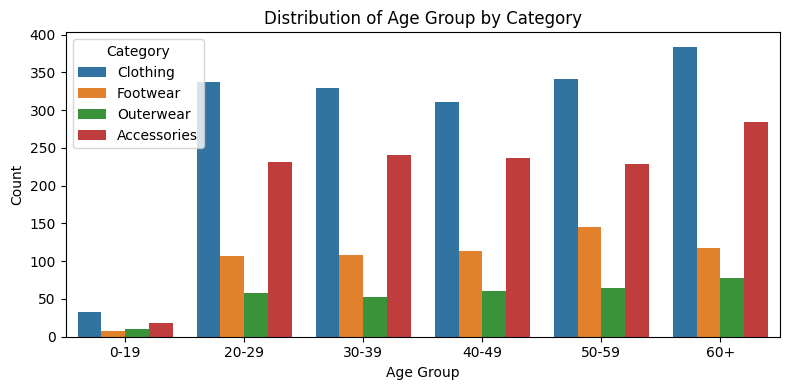

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age_group', hue='category')
plt.title('Distribution of Age Group by Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

- This analysis highlights which age groups contribute the most to each category's sales.
- **Key Findings**:
  - Age groups **20-29** and **30-39** are the most active buyers across all categories, showing high engagement in Accessories, Clothing, and Footwear.
  - The **0-19** and **60+** age groups have significantly lower sales compared to other groups.

## 2. Purchase Amount Analysis

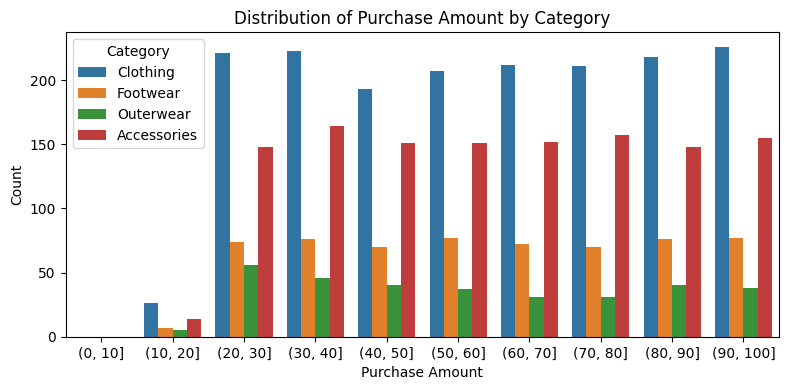

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='purchase_amount_grouped', hue='category')
plt.title('Distribution of Purchase Amount by Category')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

- Purchase amounts are grouped into ranges, revealing the spending behaviour of customers.
- **Key Findings**:
  - Most purchases are concentrated in the **$20-$30** and **$30-$40** ranges across all categories.
  - Higher purchase ranges (**$90-$100**) have fewer sales, indicating that expensive items are less frequently bought.

## 3. Promo Code Usage Analysis

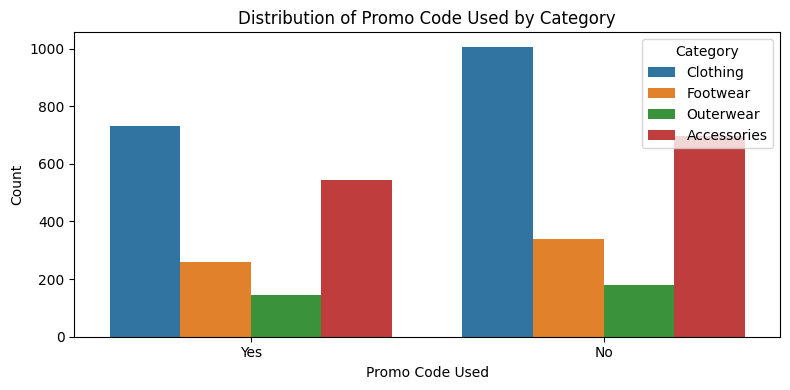

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='promo_code_used', hue='category')
plt.title('Distribution of Promo Code Used by Category')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

- Examines the impact of promo code usage on sales for different categories.
- **Key Findings**:
  - Promo codes have a noticeable impact on sales, especially for **Accessories** and **Clothing**.
  - Promo codes are less effective in driving sales for **Outerwear** compared to other categories.

## 4. Discount Application Analysis

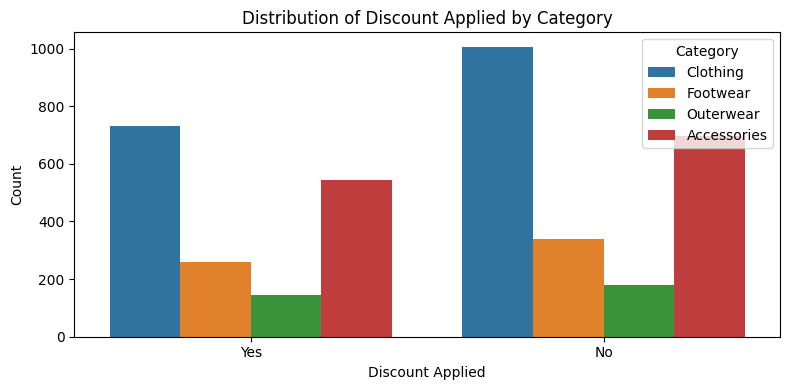

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='discount_applied', hue='category')
plt.title('Distribution of Discount Applied by Category')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

- Evaluates the role of discounts in driving category sales.
- **Key Findings**:
  - Discounts significantly boost sales, especially for **Accessories** and **Clothing**.
  - Categories like **Footwear** and **Outerwear** also benefit from discounts but to a lesser extent.

## 5. Season Analysis

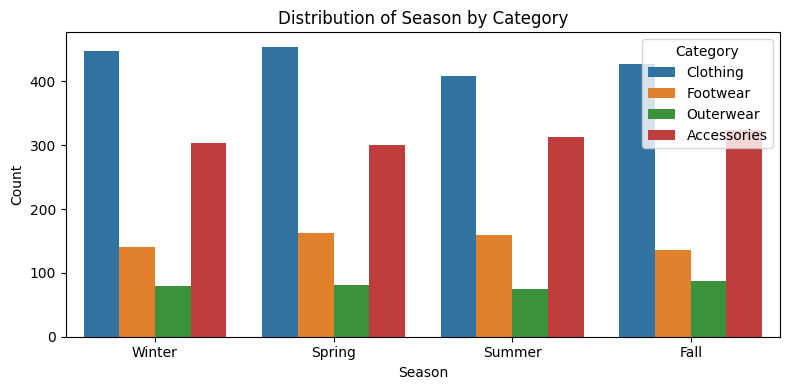

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='season', hue='category')
plt.title('Distribution of Season by Category')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

**Clothing**
- Clothing is the **most purchased category** across all seasons.
- The number of purchases is relatively consistent, with slight variations between seasons.

**Accessories**
- Accessories show a **significant rise in Spring and Fall** compared to Winter and Summer.
- They are the **second most purchased category** overall.

**Footwear**
- Footwear is purchased more in **Summer and Spring**, suggesting seasonal preferences.
- Winter sees the **lowest number of footwear purchases**.

**Outerwear**
- Outerwear is predominantly purchased in **Winter**, aligning with colder weather needs.
- Purchases drop significantly in **other seasons**.


This analysis highlights clear **seasonal trends**, such as increased outerwear purchases in Winter and higher footwear purchases in warmer seasons.


## 6. Gender Analysis

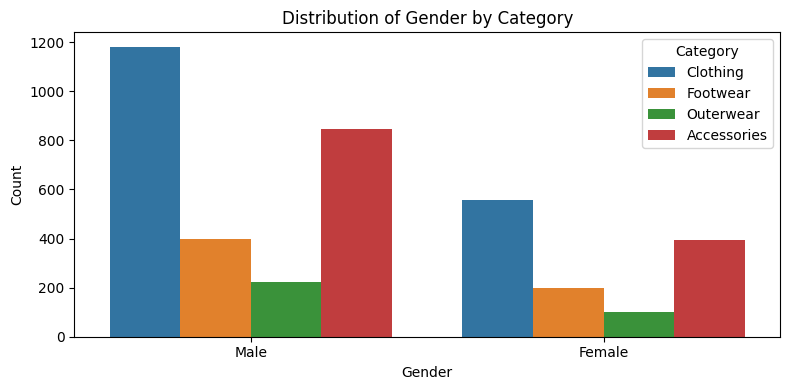

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='gender', hue='category')
plt.title('Distribution of Gender by Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Accessories
- **Female**: Accessories constitute **31.41%** of purchases.
- **Male**: Accessories constitute **31.98%** of purchases.
- **Observation**: Both genders have a similar preference for accessories, with slightly higher purchases among males.

## Clothing
- **Female**: Clothing constitutes **44.55%** of purchases.
- **Male**: Clothing constitutes **44.53%** of purchases.
- **Observation**: Clothing is the most purchased category for both genders, with negligible differences in purchase percentages.

## Footwear
- **Female**: Footwear constitutes **15.95%** of purchases.
- **Male**: Footwear constitutes **15.08%** of purchases.
- **Observation**: Females purchase slightly more footwear compared to males.

## Outerwear
- **Female**: Outerwear constitutes **8.09%** of purchases.
- **Male**: Outerwear constitutes **8.41%** of purchases.
- **Observation**: Males purchase slightly more outerwear than females, but the difference is minimal.


# General Insights
- **Clothing** is the dominant category for both genders, followed by **Accessories**.
- **Footwear** and **Outerwear** are less popular overall but still show minor variations in preferences between genders.
- The purchasing patterns between males and females are relatively consistent, with only slight variations in categories like Footwear and Outerwear.


## Bivariate Analysis

## 1. Discount Applied vs. Category


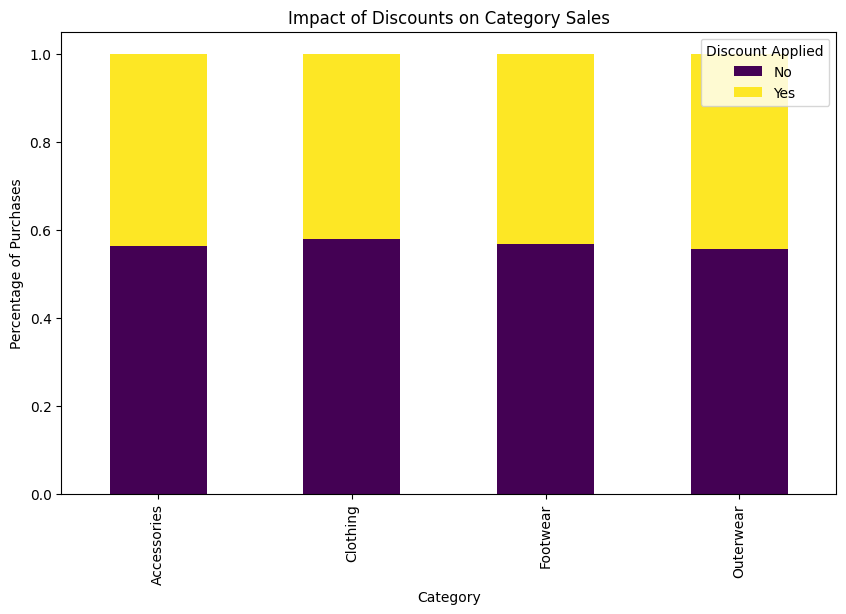

In [ ]:
# Group by category and discount applied
discount_analysis = df.groupby(['category', 'discount_applied']).size().unstack()

# Normalize by category for percentages
discount_analysis_percentage = discount_analysis.div(discount_analysis.sum(axis=1), axis=0)

# Plot stacked bar chart
discount_analysis_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Impact of Discounts on Category Sales')
plt.xlabel('Category')
plt.ylabel('Percentage of Purchases')
plt.legend(title='Discount Applied')
plt.show()


**Overall Promo Code Usage**  
Purchases where promo codes were not used are significantly higher than those where promo codes were applied, across all purchase amount groups.

**High Purchase Amounts**  
In the higher purchase amount groups (e.g., $90-$100), customers without promo codes dominate. This may indicate that customers making larger purchases are less inclined to use promo codes.

**Low Purchase Amounts**  
For lower purchase amount groups (e.g., $10-$20 and $20-$30), promo code usage is relatively lower compared to higher ranges, but the gap between users and non-users is still consistent.

**Steady Distribution**  
The distribution of purchase amounts shows a steady count for non-promo code users across groups, with peaks around the $90-$100 range. In contrast, promo code usage remains more balanced but consistently lower.

**Potential Targeting Opportunity**  
Promo code strategies might benefit from targeting higher purchase amount groups, where non-users are currently dominant, to encourage savings and boost loyalty.


## 2. Promo Code Used vs. Purchase Amount Grouped

<ipython-input-34-708967d5364a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_analysis = df.groupby(['promo_code_used', 'purchase_amount_grouped']).size().unstack()


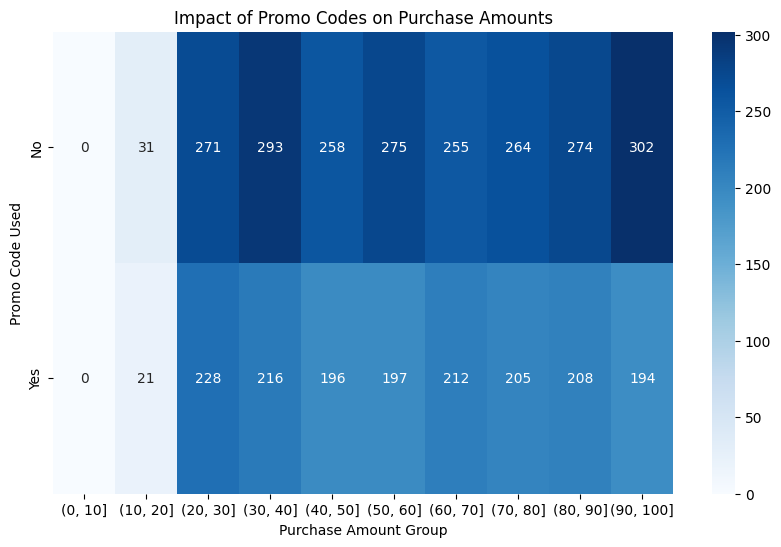

In [ ]:
# Group by promo code usage and purchase amount grouped
promo_analysis = df.groupby(['promo_code_used', 'purchase_amount_grouped']).size().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(promo_analysis, annot=True, fmt='d', cmap='Blues')
plt.title('Impact of Promo Codes on Purchase Amounts')
plt.xlabel('Purchase Amount Group')
plt.ylabel('Promo Code Used')
plt.show()


**Overall Promo Code Usage**
- **No Promo Code**: Purchases without promo codes are significantly higher across all purchase amount groups.
- **Promo Code Used**: Purchases with promo codes are consistently lower in volume compared to non-users.
- **Observation**: The majority of customers do not rely on promo codes, regardless of the purchase amount.

**High Purchase Amounts**
- **No Promo Code**: Dominates the $90-$100 range with the highest purchase count.
- **Promo Code Used**: Shows a decline in usage for higher purchase amounts.
- **Observation**: Customers making larger purchases are less inclined to use promo codes.

**Mid Purchase Amounts**
- **No Promo Code**: Steady purchase counts in the $40-$70 range, remaining dominant.
- **Promo Code Used**: Relatively consistent usage but remains significantly lower than non-users.
- **Observation**: The gap between promo code users and non-users narrows slightly in this range.

**Low Purchase Amounts**
- **No Promo Code**: Dominates the $10-$30 range but with lower counts compared to higher ranges.
- **Promo Code Used**: Relatively higher usage compared to other ranges, especially in the $10-$20 group.
- **Observation**: Customers making smaller purchases are more likely to use promo codes to maximize savings.

**Distribution Trends**
- **No Promo Code**: Shows a steady increase in purchase counts across all groups, peaking in the $90-$100 range.
- **Promo Code Used**: Exhibits a more uniform distribution with no significant peaks.
- **Observation**: Non-promo code users show higher purchase amounts, while promo codes are not driving larger cart sizes.

**Potential Targeting Opportunities**
- **High Purchase Amounts**: Target promo code campaigns at $70-$100 purchase groups to incentivize savings for larger carts.
- **Low Purchase Amounts**: Offer smaller, easily redeemable promo codes for budget-conscious customers in the $10-$30 range.
- **General**: Educate non-promo code users on the value of discounts to drive customer loyalty and repeat purchases.


## 3. Season vs. Category

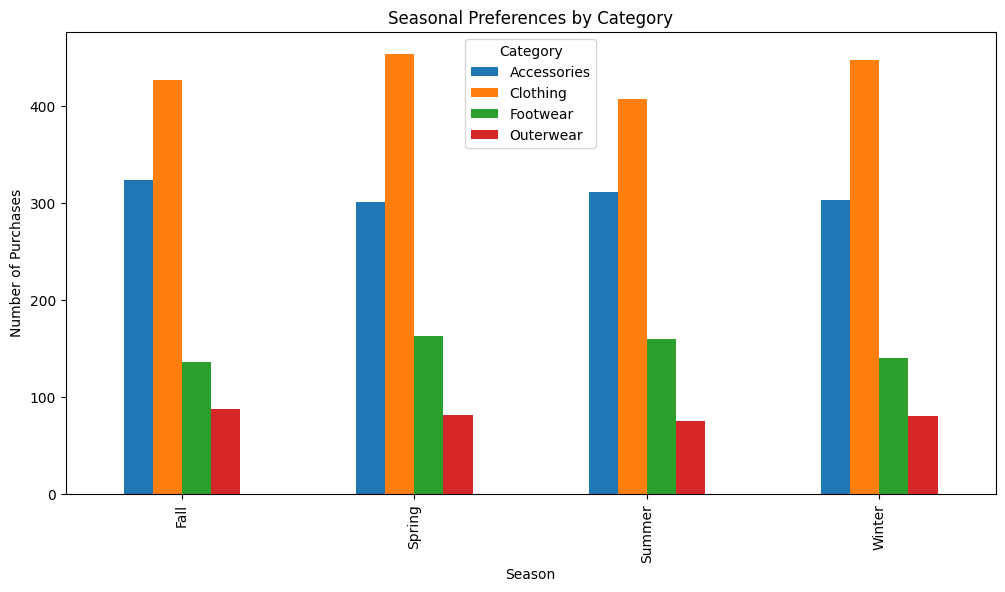

In [ ]:
# Group by season and category
season_category = df.groupby(['season', 'category']).size().unstack()

# Plot grouped bar chart
season_category.plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Preferences by Category')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Category')
plt.show()


**Accessories**
- **Female**: Accessories constitute 31.41% of purchases.
- **Male**: Accessories constitute 31.98% of purchases.
- **Observation**: Both genders show a similar preference for Accessories, with slightly higher purchases among males.

**Clothing**
- **Female**: Clothing constitutes 44.55% of purchases.
- **Male**: Clothing constitutes 44.53% of purchases.
- **Observation**: Clothing is the most purchased category for both genders, with negligible differences in purchase percentages.

**Footwear**
- **Female**: Footwear constitutes 15.95% of purchases.
- **Male**: Footwear constitutes 15.08% of purchases.
- **Observation**: Females purchase slightly more Footwear compared to males.

**Outerwear**
- **Female**: Outerwear constitutes 8.09% of purchases.
- **Male**: Outerwear constitutes 8.41% of purchases.
- **Observation**: Males purchase slightly more Outerwear than females, though the difference is minimal.

**General Insights**
- **Clothing**: The dominant category for both genders.
- **Accessories**: The second most popular category for both genders.
- **Footwear & Outerwear**: Less popular overall but show minor gender-based variations.
- **Purchasing Patterns**: Relatively consistent between males and females, with slight differences in categories like Footwear and Outerwear.


# Conclusion
### How Product Categories Affect Sales Trends:

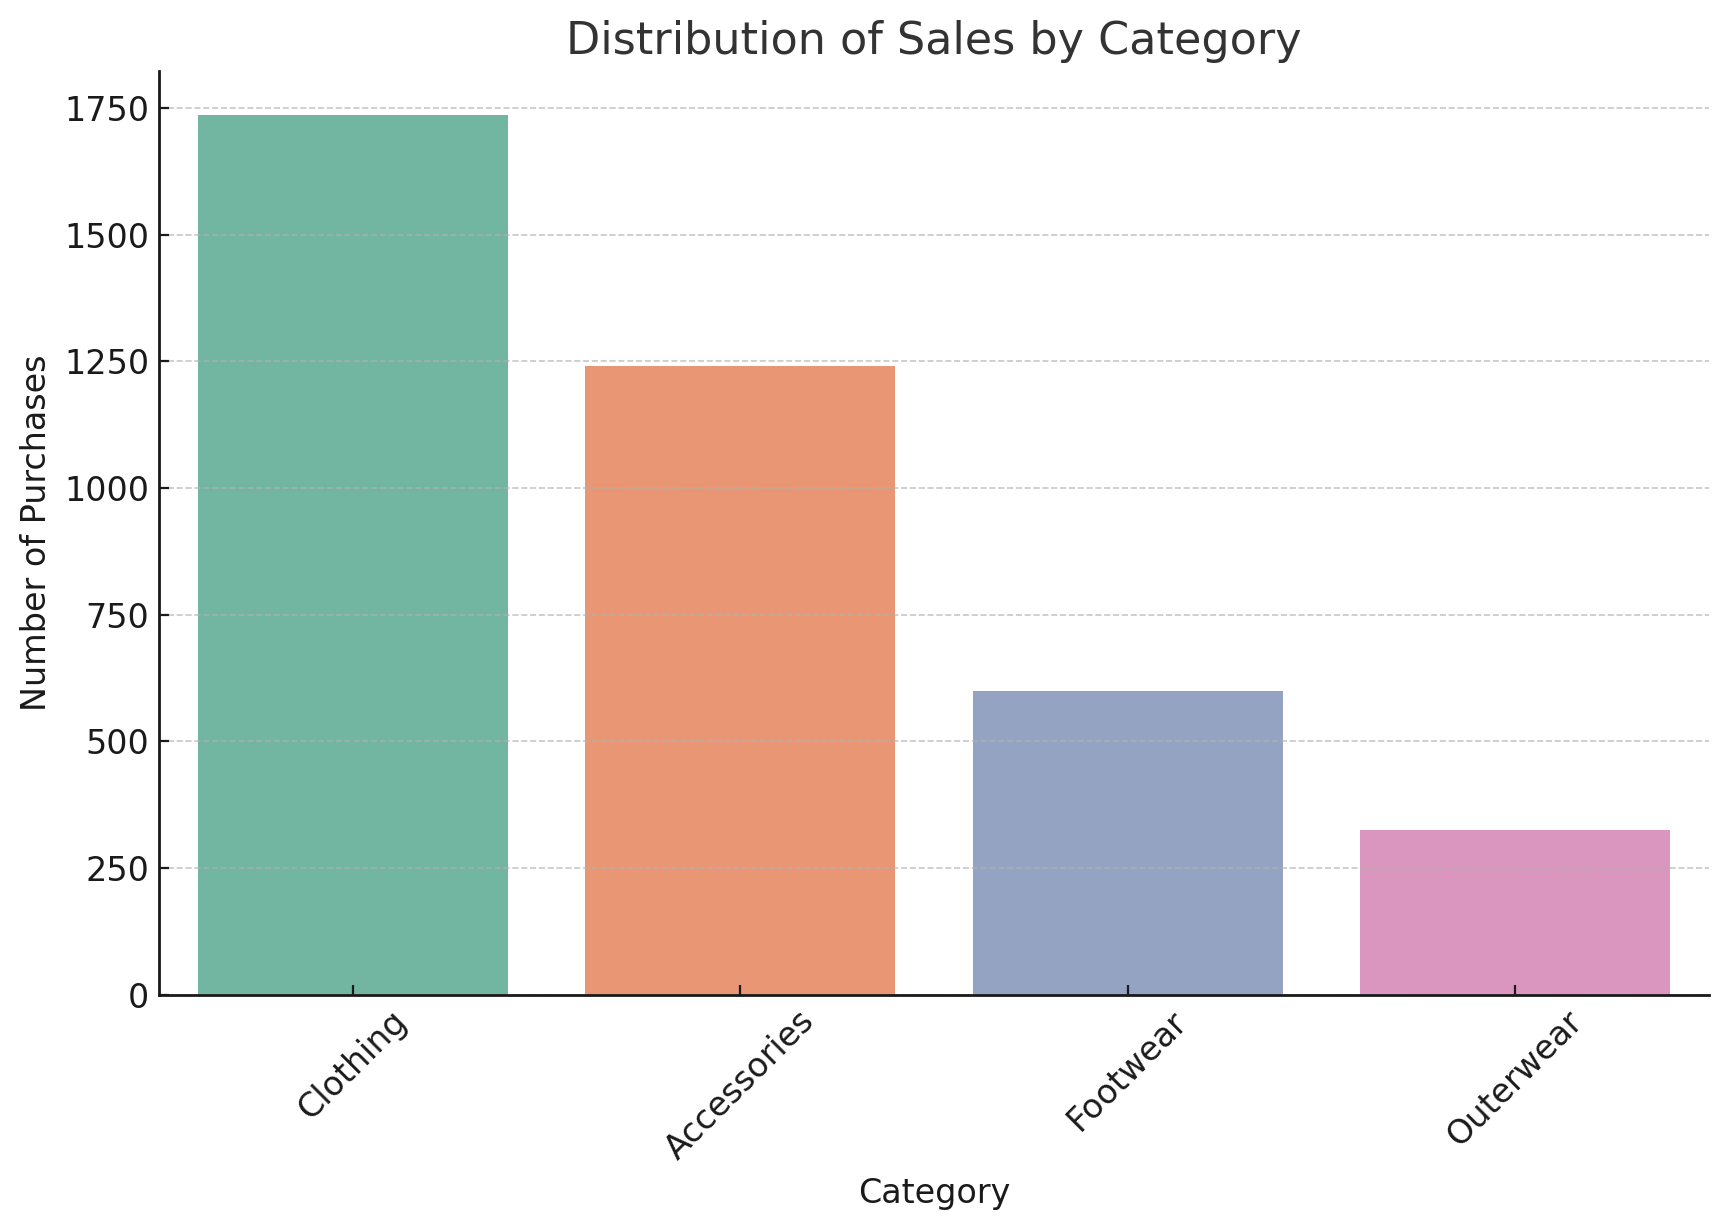

In [ ]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Shopping Trends/sales_by_category.png", width=600, height=400)

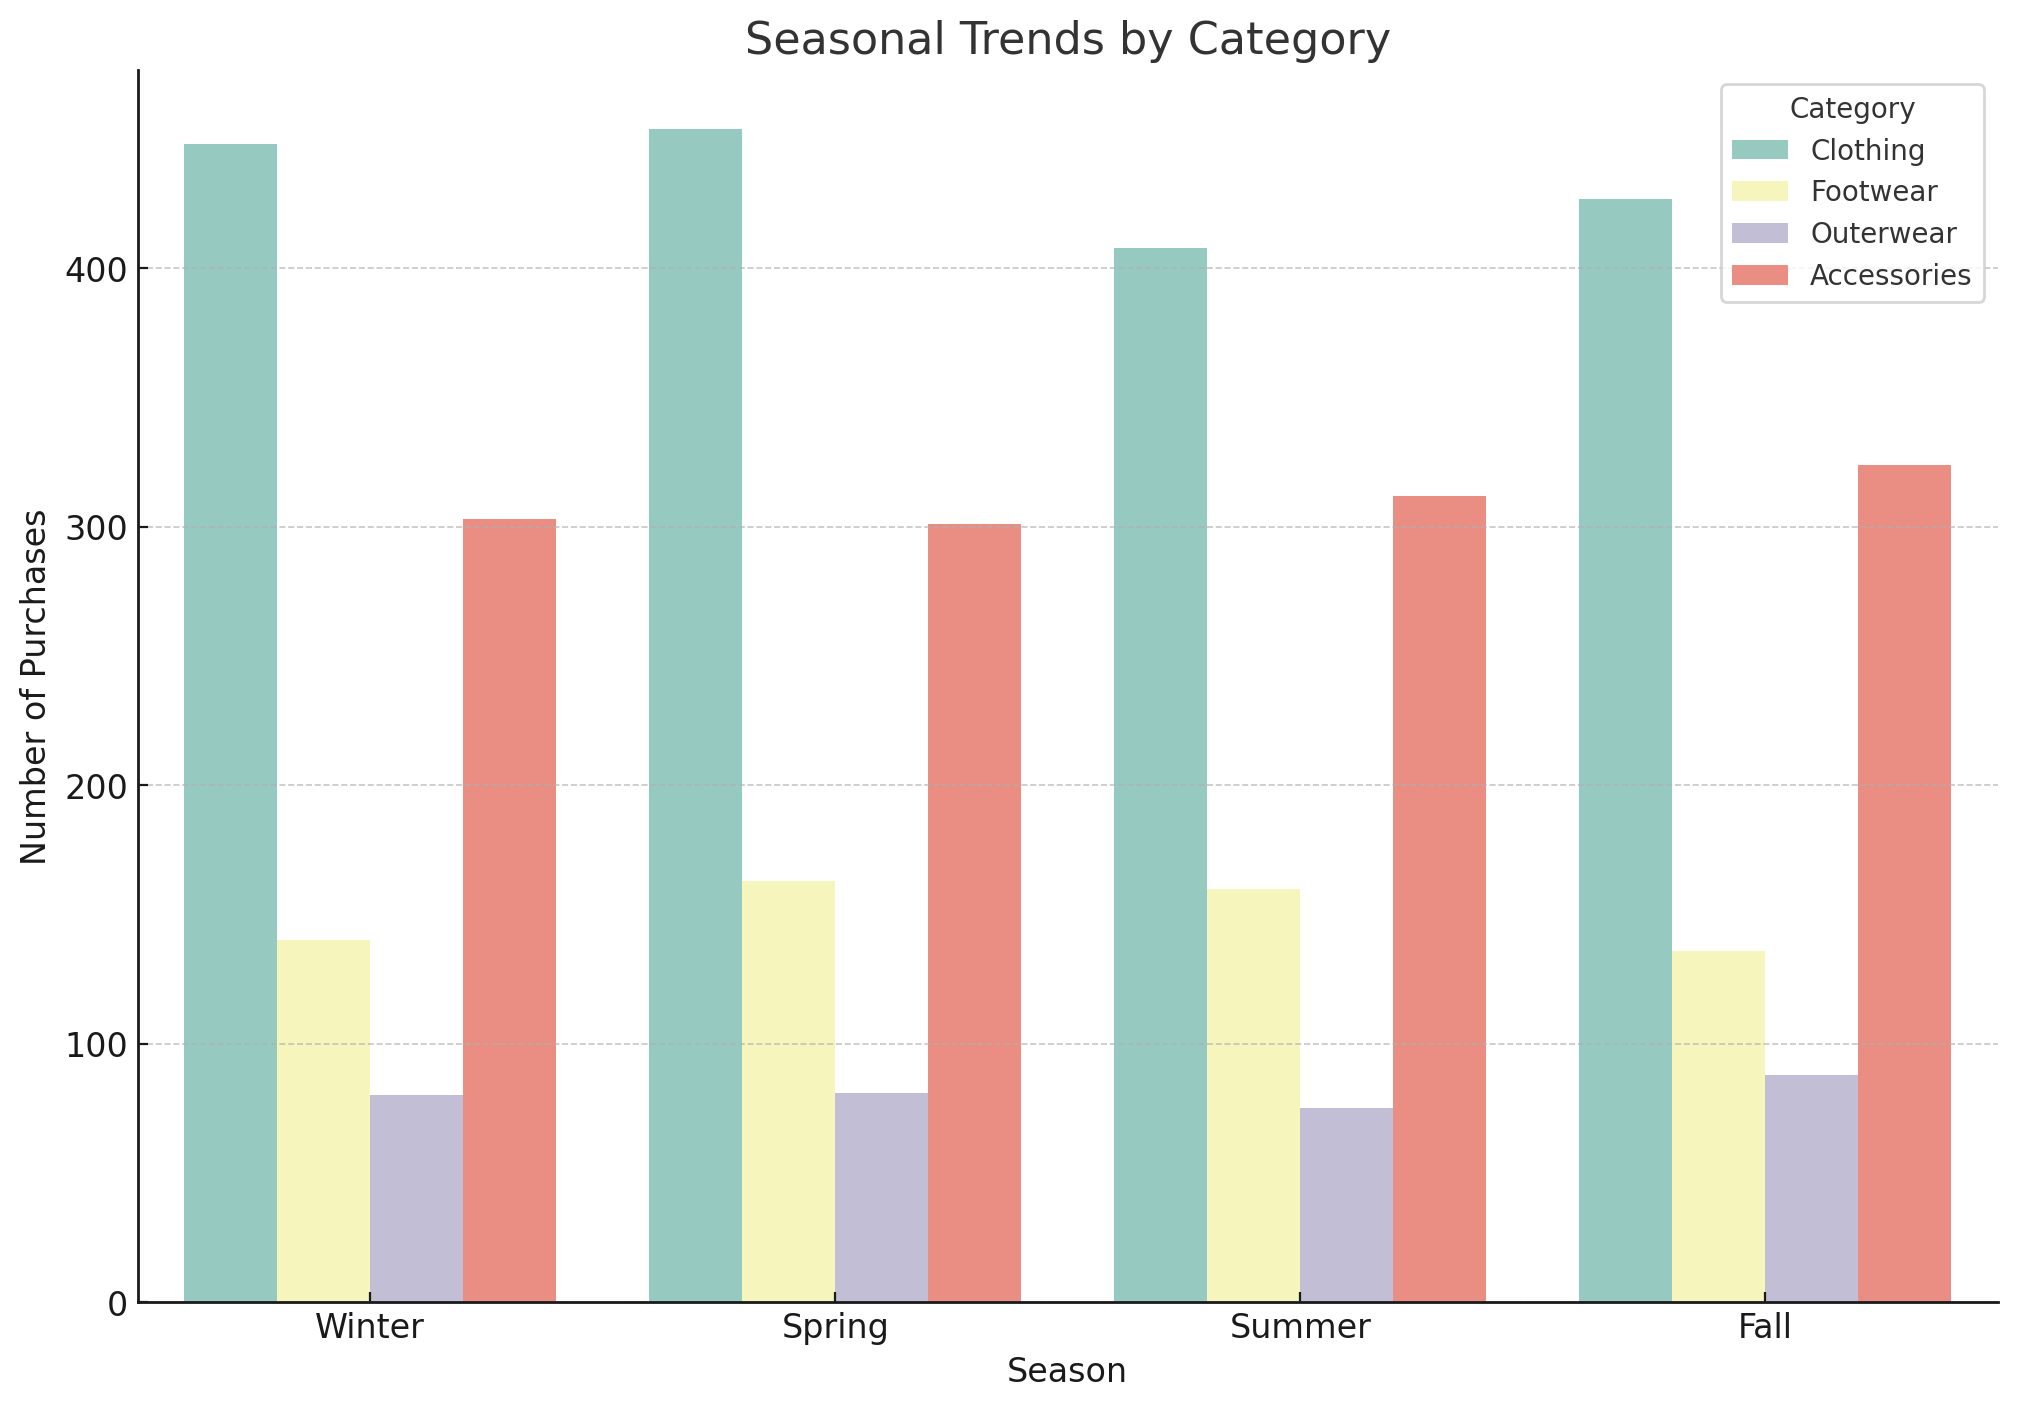

In [ ]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Shopping Trends/seasons_by_category.png", width=600, height=400)

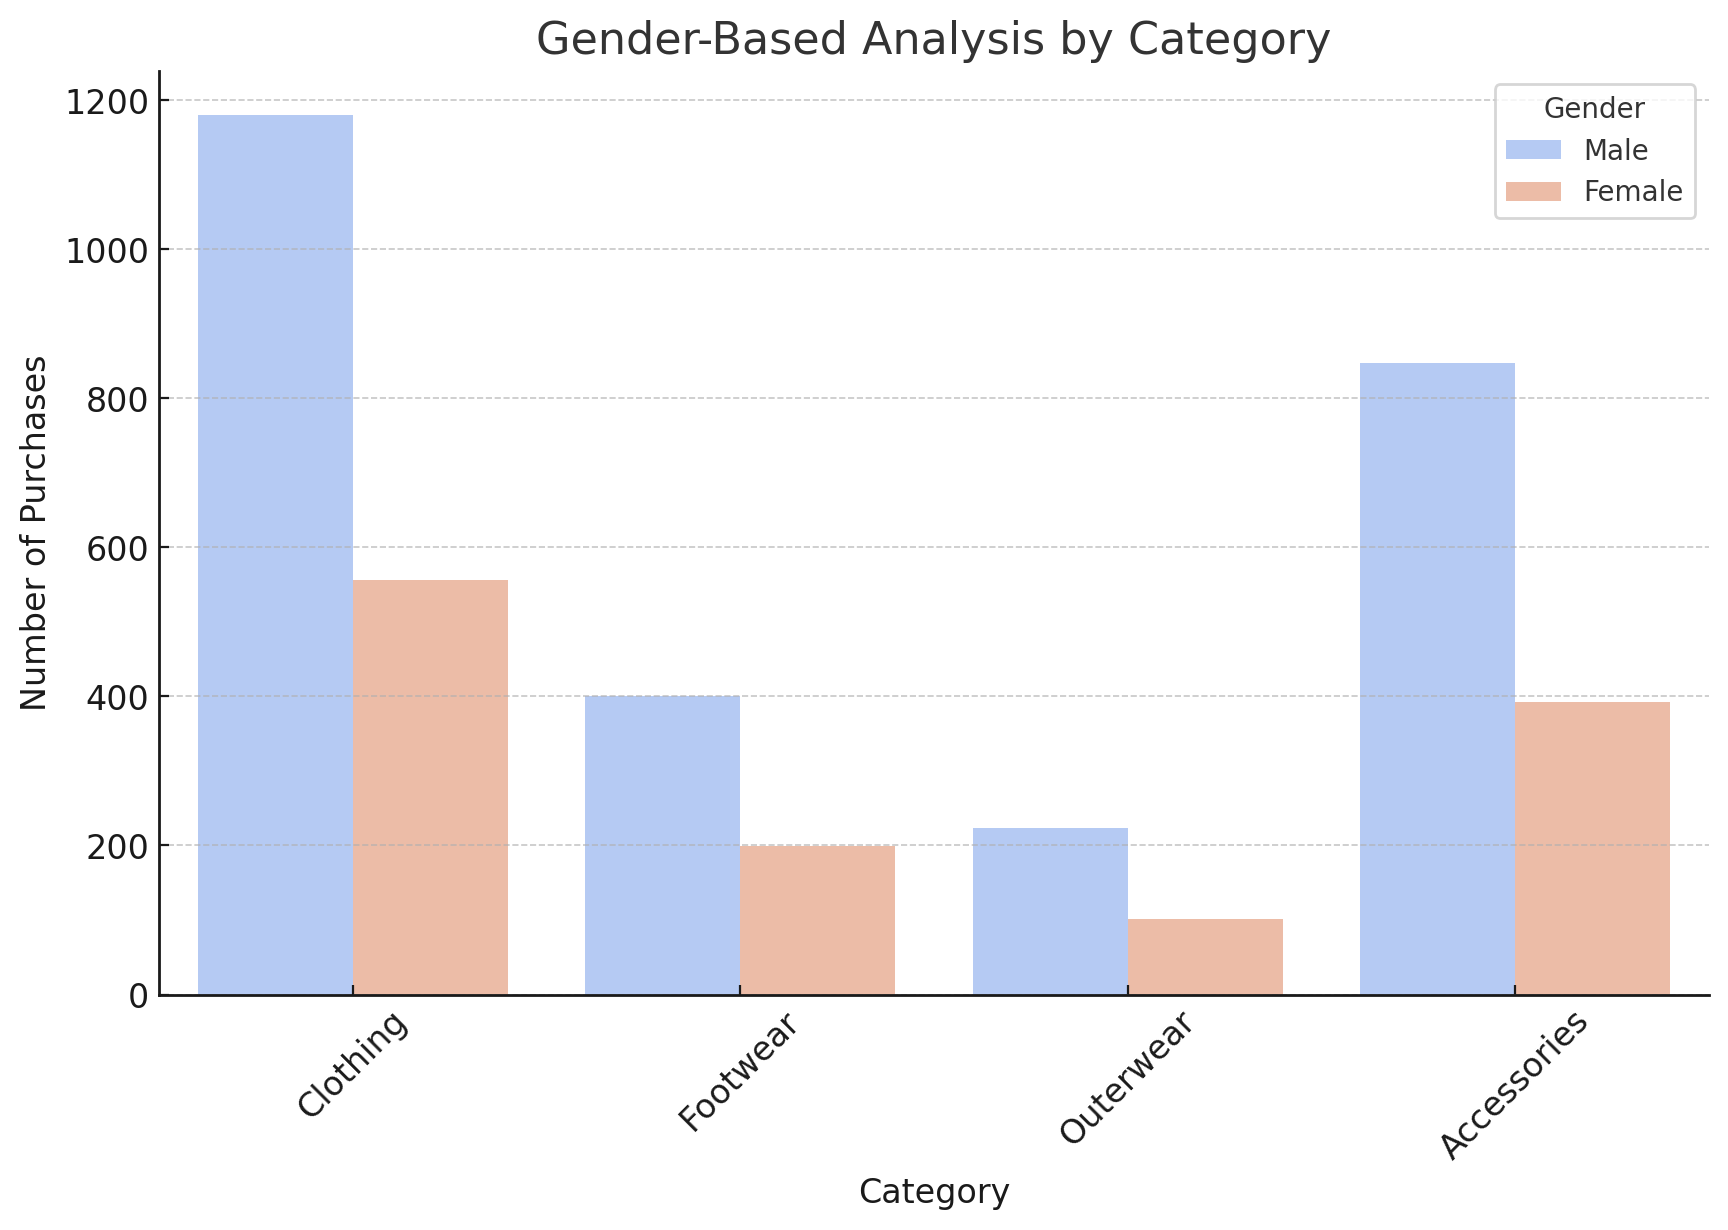

In [ ]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Shopping Trends/gender_based_analysis.png", width=600, height=400)

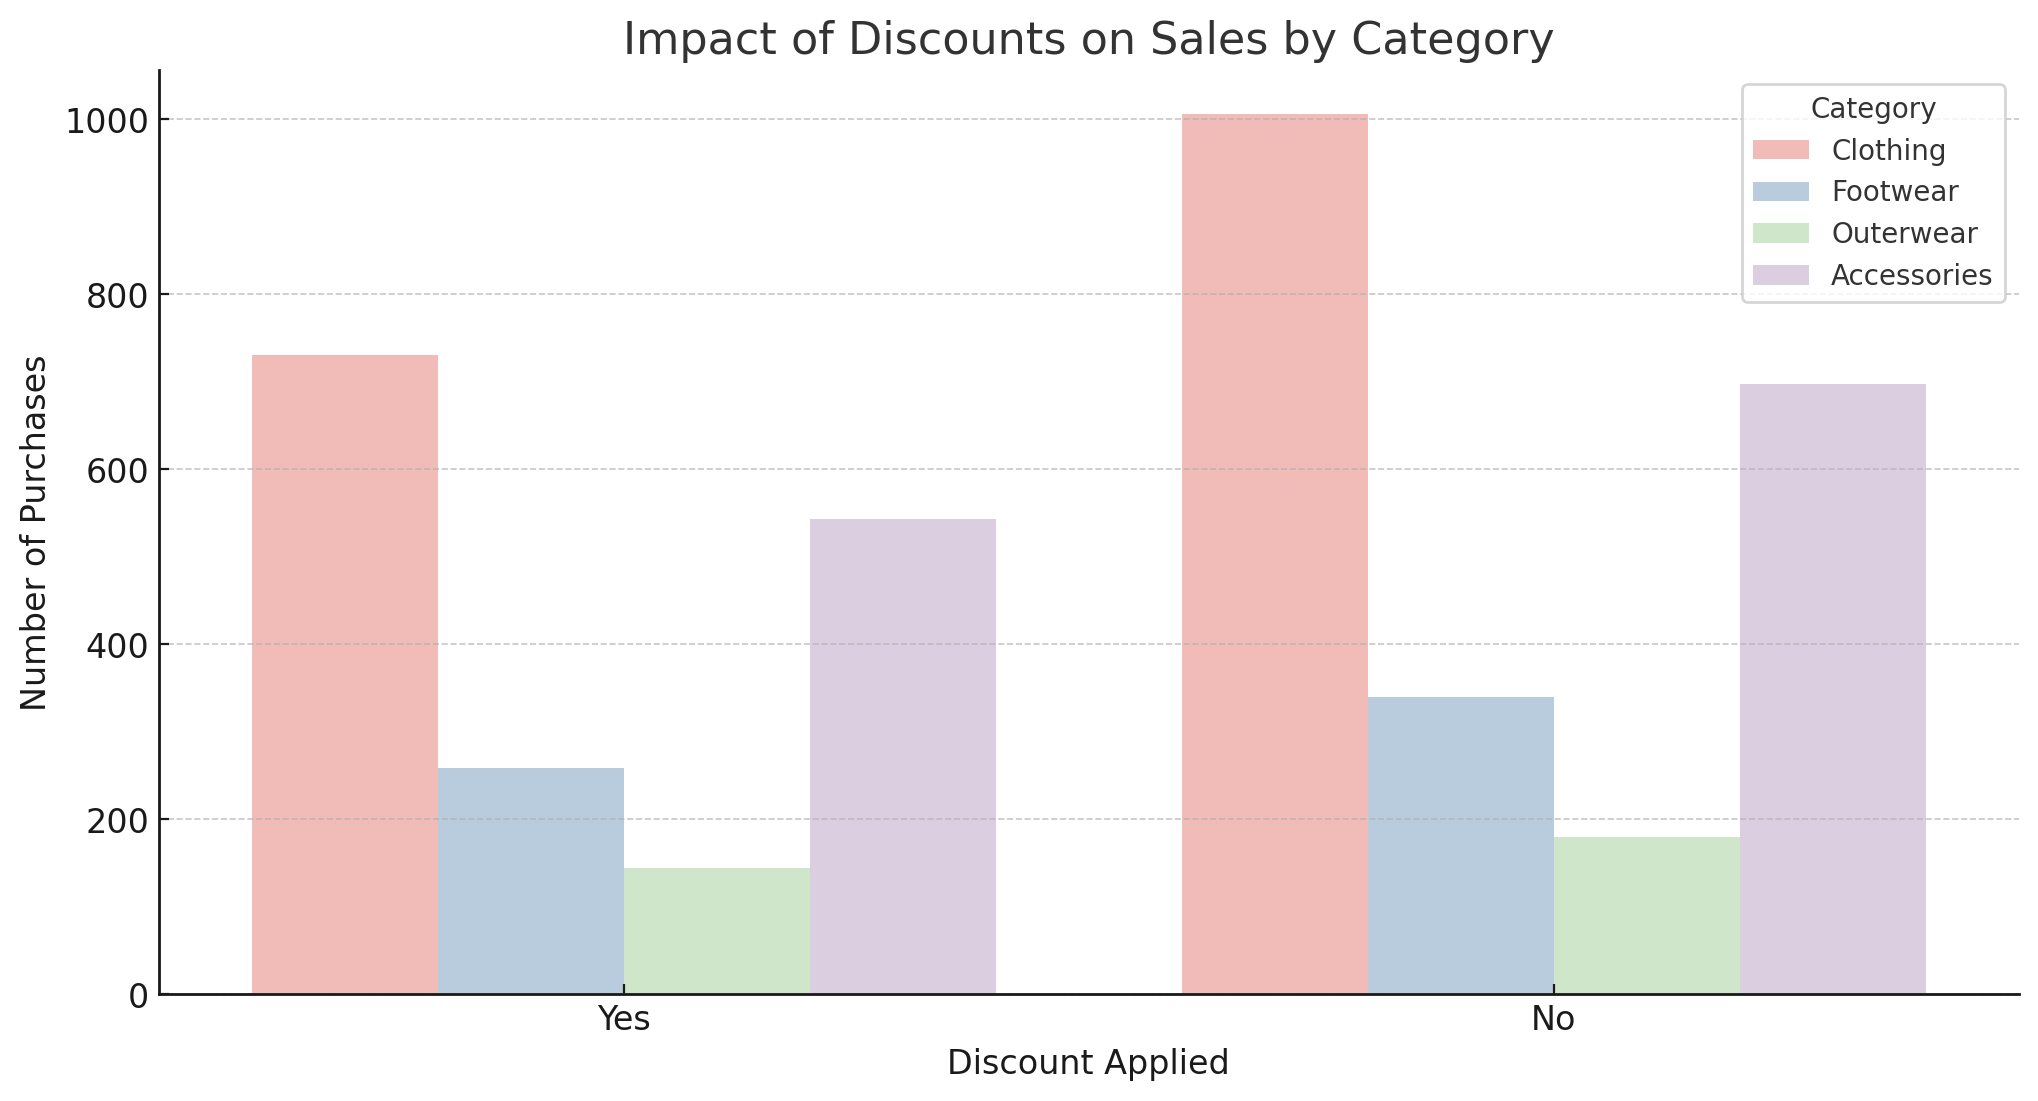

In [ ]:
Image(filename="/content/drive/My Drive/Colab Notebooks/Shopping Trends/impact_of_discount_on_sales.png", width=600, height=400)

1. **Dominance of Clothing**:
   - Clothing is the most purchased category, accounting for 44.5% of all sales, while Outerwear accounts for only 8.3%, making it the least popular.
   - Clothing is consistently purchased across all seasons, indicating year-round demand, whereas other categories like Footwear and Outerwear show seasonal variations:
     - **Footwear**: Higher sales in Summer and Spring.
     - **Outerwear**: Predominantly purchased in Winter.
   - The age groups 20-29 and 30-39 drive the majority of purchases across all categories, with minimal contributions from the 0-19 and 60+ age groups.

2. **Spending Behavior**:
   - Most customers make purchases in the mid-range price groups (20-30 and 30-40), indicating a preference for moderately priced items.
   - Higher price ranges (90-100) see significantly fewer sales, suggesting customers are less likely to buy expensive items.

3. **Gender Patterns**:
   - Purchasing behavior between genders is largely consistent, with minor variations:
     - Both genders show a strong preference for Clothing and Accessories.
     - Females purchase slightly more Footwear, while males purchase slightly more Outerwear.

### How Discounts Affect Sales Trends:
1. **Impact of Discounts**:
   - Discounts significantly boost sales, particularly in the Accessories and Clothing categories.
   - Footwear and Outerwear also see increased sales due to discounts, but to a lesser extent.

2. **Promo Code Effectiveness**:
   - Promo codes drive sales more effectively in lower price ranges (10-30) but are underutilized in higher price ranges (90-100).
   - Promo code usage is more balanced but consistently lower compared to non-promo code purchases across all price groups.
   - **Targeting Opportunity**: Promo code strategies could be refined to attract customers in higher purchase ranges (70-100) to encourage savings on larger carts.

3. **Customer Segmentation for Discounts**:
   - Discounts and promo codes should target younger, highly engaged age groups (20-39) and moderately priced products (20-40 price range) to maximize their impact.

### Summary of Findings:
- **Clothing** is the most significant driver of sales, with Accessories as the second-most purchased category. Seasonal preferences strongly influence sales in categories like Footwear (warmer seasons) and Outerwear (Winter).
- Discounts and promo codes play a crucial role in increasing sales, especially for popular categories like Clothing and Accessories. However, they are less effective for high-priced items and categories like Outerwear.
- Targeted discount campaigns for specific price ranges and customer segments (e.g., younger age groups, higher purchase amounts) can help optimize sales further.

### Recommendations:
1. **Seasonal Promotions**:
   - Focus on **Outerwear** discounts during Winter and **Footwear** discounts during Spring and Summer.
2. **Promo Code Campaigns**:
   - Encourage promo code usage for higher-priced items (70-100 price range) to maximize sales.
   - Offer smaller, easily redeemable promo codes for budget-conscious customers in lower price ranges (10-30).
3. **Customer Segmentation**:
   - Prioritize marketing efforts for age groups 20-39, as they are the most active buyers.
   - Maintain consistent engagement for Clothing and Accessories, given their year-round demand.
